In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#آماده سازی
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train_noisy = X_train_noisy.reshape(len(X_train_noisy), 784)
X_test_noisy = X_test_noisy.reshape(len(X_test_noisy), 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [18]:
input_img = Input(shape=(784,))

encoder = Dense(units=32, activation='relu')(input_img)
decoder = Dense(units=784, activation='sigmoid')(encoder)

autoencoder = Model(input_img, decoder)
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#training
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.fit(X_train,X_train,
#                 epochs=30,
#                 batch_size=256)


#training
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy,X_train,
                epochs=30,
                batch_size=256)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3717
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2030
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1791
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1626
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1531
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1458
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1405
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1375
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1349
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1333
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1324
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1316
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1315
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1313
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

In [20]:
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#test
pred = autoencoder.predict(X_test_noisy)
encoded_img = encoder_model.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


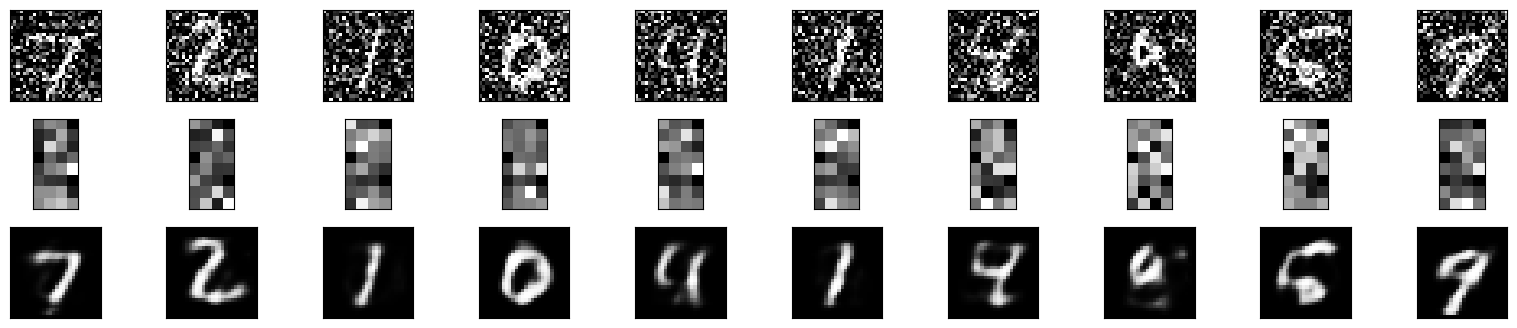

In [22]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_img[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()